List of links possibly worth investigating:
https://rapidapi.com/collection/tv-api
https://tvlistings.ctvdigital.net/service/metadata
https://tvlistings.gracenote.com/grid-affiliates.html?aid=orbebb
https://www.the-numbers.com/tv-show/That-70s-Show#tab=summary
https://www.businessofapps.com/data/netflix-statistics/#1
https://www.statista.com/chart/10311/netflix-subscriptions-usa-international/
https://www.lafabbricadellarealta.com/open-data-entertainment/

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url3 = 'https://www.emmys.com/awards/nominees-winners'
html3 = requests.get(url3)
soup3 = BeautifulSoup(html3.content, 'html.parser')

In [3]:
award_titles_container = soup3.find('div', class_ = 'section-content item-list pt-3 row')

In [4]:
titles = award_titles_container.findAll('h5', class_ = 'mb-1')

In [5]:
nominated_shows = []
for tag in titles[:7]:
    nominated_shows.append(tag.text.strip())
#nominated_shows

In [6]:
actors = []
for tag in titles[8:]:
    actors.append(tag.text.strip())
#actors

In [7]:
show_names_for_actors = award_titles_container.findAll('div', class_ = 'p1 show-title')
#show_names_for_actors

In [8]:
shows_nominated_actors = []
for tag in show_names_for_actors:
    shows_nominated_actors.append(tag.text.strip())
#shows_nominated_actors

In [9]:
url4 = 'https://www.emmys.com/awards/nominees-winners?page=1'
html4 = requests.get(url4)
soup4 = BeautifulSoup(html4.content, 'html.parser')
#soup

In [10]:
award_titles_container2 = soup4.find('div', class_ = 'section-content item-list pt-3 row')
#award_titles_container2

In [11]:
titles2 = award_titles_container2.findAll('h5', class_ = 'mb-1')
#titles2

In [12]:
for tag in titles2[5:28]:
    nominated_shows.append(tag.text.strip())
#nominated_shows

In [13]:
for tag in titles2[:6]:
    actors.append(tag.text.strip())

In [14]:
for tag in titles2[28:]:
    actors.append(tag.text.strip())

In [15]:
#actors

In [16]:
show_names_for_actors2 = award_titles_container2.findAll('div', class_ = 'p1 show-title')

In [17]:
for tag in show_names_for_actors2:
    shows_nominated_actors.append(tag.text.strip())

In [18]:
url5 = 'https://www.emmys.com/awards/nominees-winners?page=2'
html5 = requests.get(url5)
soup5 = BeautifulSoup(html5.content, 'html.parser')

In [19]:
award_titles_container3 = soup5.find('div', class_ = 'section-content item-list pt-3 row')

In [20]:
titles3 = award_titles_container3.findAll('h5', class_ = 'mb-1')

In [21]:
for tag in titles3[:-6]:
    actors.append(tag.text.strip())

In [22]:
shows_nominated_actors3 = soup5.findAll('div', class_ = 'p1 show-title')

In [23]:
for tag in shows_nominated_actors3[:-1]:
    shows_nominated_actors.append(tag.text.strip())
#shows_nominated_actors

In [24]:
#make sure lists are same length before creating a dictionary 
print(len(actors))
print(len(shows_nominated_actors))

80
80


In [25]:
#dictionary pairing nominated actors and the shows they were nominated for 
nominated_actors = dict(zip(actors, shows_nominated_actors))
#nominated_actors

In [26]:
nominated_shows_dict = dict((x,nominated_shows.count(x)) for x in nominated_shows)

In [27]:
#nominated_shows_dict

In [28]:
df = pd.DataFrame.from_dict(nominated_shows_dict, 'index')
df.columns = ['Nominations']
len(df)                                                          

21

In [29]:
actor_show_noms = dict((x,shows_nominated_actors.count(x)) for x in shows_nominated_actors)
#actor_show_noms

In [30]:
df2 = pd.DataFrame.from_dict(actor_show_noms,'index')
df2.columns = ['Actor Nominations']
df2.head()

,Actor Nominations
Black Monday,1
black-ish,2
Ramy,2
Schitt's Creek,4
The Good Place,4


In [31]:
joined_df = df.join(df2,how = 'outer')
joined_df.fillna(0, inplace=True)
#joined_df

In [32]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, A Black Lady Sketch Show to black-ish
Data columns (total 2 columns):
Nominations          39 non-null float64
Actor Nominations    39 non-null float64
dtypes: float64(2)
memory usage: 936.0+ bytes


In [33]:
pd.options.display.float_format = '{:,.0f}'.format

In [34]:
#joined_df

Next steps: 
1. pull in network from Emmy's page
2. find genre 
3. look into other awards shows/ international awards

In [35]:
joined_df['Award Year'] = '2020'

In [36]:
joined_df

,Nominations,Actor Nominations,Award Year
A Black Lady Sketch Show,0,1,2020
Bette Midler,1,0,2020
Better Call Saul,1,1,2020
Big Little Lies,0,2,2020
Black Mirror,0,1,2020
Black Monday,0,1,2020
Brooklyn Nine-Nine,0,1,2020
Curb Your Enthusiasm,1,0,2020
Dead To Me,1,2,2020
Euphoria,0,1,2020


In [37]:
url2019 = 'https://www.emmys.com/awards/nominees-winners/2019'
html2019 = requests.get(url2019)
soup2019 = BeautifulSoup(html2019.content, 'html.parser')

In [38]:
award_titles_container2019 = soup2019.find('div', class_ = 'section-content item-list pt-3 row')

In [39]:
titles2019 = award_titles_container2019.findAll('h5', class_ = 'mb-1')

In [40]:
shows2019 = []
for tag in titles2019[:7]:
    shows2019.append(tag.text.strip())

actors2019 = []
for tag in titles2019[7:]:
    actors2019.append(tag.text.strip())

show_names_for_actors2019 = award_titles_container2019.findAll('div', class_ = 'p1 show-title')

shows_nominated_actors2019 = []
for tag in show_names_for_actors2019:
    shows_nominated_actors2019.append(tag.text.strip())

In [41]:
print(len(shows_nominated_actors2019))
print(len(actors2019))

33
33


In [42]:
url2019_1 = 'https://www.emmys.com/awards/nominees-winners/2019?page=1'
html2019_1 = requests.get(url2019_1)
soup2019_1 = BeautifulSoup(html2019_1.content, 'html.parser')

In [43]:
award_titles_container2019_1 = soup2019_1.find('div', class_ = 'section-content item-list pt-3 row')

titles2019_1 = award_titles_container2019_1.findAll('h5', class_ = 'mb-1')

for tag in titles2019_1[6:27]:
    shows2019.append(tag.text.strip())
    
for tag in titles2019_1[-13:]:
    actors2019.append(tag.text.strip())
    
for tag in titles2019_1[:6]:
    actors2019.append(tag.text.strip())

show_names_for_actors2019_1 = award_titles_container2019_1.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2019_1:
    shows_nominated_actors2019.append(tag.text.strip())

In [44]:
url2019_2 = 'https://www.emmys.com/awards/nominees-winners/2019?page=2'
html2019_2 = requests.get(url2019_2)
soup2019_2 = BeautifulSoup(html2019_2.content, 'html.parser')

In [45]:
award_titles_container2019_2 = soup2019_2.find('div', class_ = 'section-content item-list pt-3 row')

titles2019_2 = award_titles_container2019_2.findAll('h5', class_ = 'mb-1')

for tag in titles2019_2[:13]:
    actors2019.append(tag.text.strip())

show_names_for_actors2019_2 = award_titles_container2019_2.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2019_2[:13]:
    shows_nominated_actors2019.append(tag.text.strip())

In [46]:
actor_show_noms2019 = dict((x, shows_nominated_actors2019.count(x)) for x in shows_nominated_actors2019)
#actor_show_noms2019

In [47]:
nominated_shows2019 = dict((x,shows2019.count(x)) for x in shows2019)

In [48]:
df2019 = pd.DataFrame.from_dict(nominated_shows2019, 'index')
df2019.columns = ['Nominations']

In [49]:
df2019_actors = pd.DataFrame.from_dict(actor_show_noms2019,'index')
df2019_actors.columns = ['Actor Nominations']


In [50]:
joined_df_2019 = df2019.join(df2019_actors, how='outer')
joined_df_2019.head(3)

,Nominations,Actor Nominations
Barry,4,5
Better Call Saul,1,3
Black Monday,nan,1


In [51]:
joined_df_2019['Award Year'] = '2019'

In [52]:
url2018 = 'https://www.emmys.com/awards/nominees-winners/2018'
html2018 = requests.get(url2018)
soup2018 = BeautifulSoup(html2018.content, 'html.parser')

In [53]:
award_titles_container2018 = soup2018.find('div', class_ = 'section-content item-list pt-3 row')

titles2018 = award_titles_container2018.findAll('h5', class_ = 'mb-1')

show_names_for_actors2018 = award_titles_container2018.findAll('div', class_ = 'p1 show-title')

In [54]:
actors2018 = []
shows2018 =  []
shows_nominated_actors2018 = []

for tag in titles2018[8:]:
    actors2018.append(tag.text.strip())

for tag in titles2018[:8]:
    shows2018.append(tag.text.strip())

show_names_for_actors2018 = award_titles_container2018.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2018:
    shows_nominated_actors2018.append(tag.text.strip())

In [55]:
url2018_1 = 'https://www.emmys.com/awards/nominees-winners/2018?page=1'
html2018_1 = requests.get(url2018_1)
soup2018_1 = BeautifulSoup(html2018_1.content, 'html.parser')

In [56]:
award_titles_container2018_1 = soup2018_1.find('div', class_ = 'section-content item-list pt-3 row')

titles2018_1 = award_titles_container2018_1.findAll('h5', class_ = 'mb-1')

show_names_for_actors2018_1 = award_titles_container2018_1.findAll('div', class_ = 'p1 show-title')

In [57]:
for tag in titles2018_1[:5]:
    actors2018.append(tag.text.strip())
    
for tag in titles2018_1[-12:]:
    actors2018.append(tag.text.strip())

for tag in titles2018_1[6:-12]:
    shows2018.append(tag.text.strip())

show_names_for_actors2018_1 = award_titles_container2018_1.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2018_1:
    shows_nominated_actors2018.append(tag.text.strip())

In [58]:
url2018_2 = 'https://www.emmys.com/awards/nominees-winners/2018?page=2'
html2018_2 = requests.get(url2018_2)
soup2018_2 = BeautifulSoup(html2018_2.content, 'html.parser')

In [59]:
award_titles_container2018_2 = soup2018_2.find('div', class_ = 'section-content item-list pt-3 row')

show_names_for_actors2018_2 = award_titles_container2018_2.findAll('div', class_ = 'p1 show-title')

In [60]:
show_names_for_actors2018_2 = award_titles_container2018_2.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2018_2[:13]:
    shows_nominated_actors2018.append(tag.text.strip())

In [61]:
nominated_shows2018 = dict((x,shows2018.count(x)) for x in shows2018)
len(nominated_shows2018)

16

In [62]:
df2018 = pd.DataFrame.from_dict(nominated_shows2018, 'index')
df2018.columns = ['Nominations']
df2018.head()

,Nominations
Atlanta,5
Barry,4
black-ish,1
Curb Your Enthusiasm,1
GLOW,2


In [63]:
shows_actors_nom2018 = dict((x, shows_nominated_actors2018.count(x)) for x in shows_nominated_actors2018)
len(shows_actors_nom2018)

29

In [64]:
df_2018_1 = pd.DataFrame.from_dict(shows_actors_nom2018, 'index')
df_2018_1.columns = ['Actor Nominations']

In [65]:
joined_df_2018 = df2018.join(df_2018_1,how='outer')
len(joined_df_2018)

31

In [66]:
joined_df_2018['Award Year'] = '2018'
joined_df_2018.head(2)

,Nominations,Actor Nominations,Award Year
Atlanta,5,4,2018
Barry,4,2,2018


In [67]:
url2017 = 'https://www.emmys.com/awards/nominees-winners/2017'
html2017 = requests.get(url2017)
soup2017 = BeautifulSoup(html2017.content, 'html.parser')

In [68]:
award_titles_container2017 = soup2017.find('div', class_ = 'section-content item-list pt-3 row')

titles2017 = award_titles_container2017.findAll('h5', class_ = 'mb-1')

show_names_for_actors2017 = award_titles_container2017.findAll('div', class_ = 'p1 show-title')

In [69]:
shows2017 =  []
shows_nominated_actors2017 = []

for tag in titles2017[:7]:
    shows2017.append(tag.text.strip())

show_names_for_actors2017 = award_titles_container2017.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2017:
    shows_nominated_actors2017.append(tag.text.strip())

In [70]:
url2017_1 = 'https://www.emmys.com/awards/nominees-winners/2017?page=1'
html2017_1 = requests.get(url2017_1)
soup2017_1 = BeautifulSoup(html2017_1.content, 'html.parser')

In [71]:
award_titles_container2017_1 = soup2017_1.find('div', class_ = 'section-content item-list pt-3 row')

titles2017_1 = award_titles_container2017_1.findAll('h5', class_ = 'mb-1')

show_names_for_actors2017_1 = award_titles_container2017_1.findAll('div', class_ = 'p1 show-title')

In [72]:
for tag in titles2017_1[6:-13]:
    shows2017.append(tag.text.strip())

show_names_for_actors2017_1 = award_titles_container2017_1.findAll('div', class_ = 'p1 show-title')

for tag in show_names_for_actors2017_1:
    shows_nominated_actors2017.append(tag.text.strip())

In [73]:
url2017_2 = 'https://www.emmys.com/awards/nominees-winners/2017?page=2'
html2017_2 = requests.get(url2017_2)
soup2017_2 = BeautifulSoup(html2017_2.content, 'html.parser')

In [74]:
award_titles_container2017_2 = soup2017_2.find('div', class_ = 'section-content item-list pt-3 row')

show_names_for_actors2017_2 = award_titles_container2017_2.findAll('div', class_ = 'p1 show-title')

In [75]:
for tag in show_names_for_actors2017:
    shows_nominated_actors2017.append(tag.text.strip())

In [76]:
nominated_shows2017 = dict((x, shows2017.count(x)) for x in shows2017)

In [77]:
shows_actor_noms2017 = dict((x, shows_nominated_actors2017.count(x)) for x in shows_nominated_actors2017)

In [78]:
df2017 = pd.DataFrame.from_dict(nominated_shows2017, 'index')
df2017.columns = ['Nominations']
df2017.head()

,Nominations
Atlanta,4
black-ish,1
Master Of None,2
Modern Family,1
Silicon Valley,4


In [79]:
df2017_1 = pd.DataFrame.from_dict(shows_actor_noms2017, 'index')
df2017_1.columns = ['Actor Nominations']
df2017_1.head()

,Actor Nominations
Atlanta,2
Baskets,4
black-ish,5
Master Of None,3
Shameless,2


In [80]:
joined_df_2017 = df2017.join(df2017_1, how = 'outer')

In [81]:
joined_df_2017['Award Year'] = '2017'

In [82]:
network = soup3.findAll('div', class_ = 'upper show-network mb-1')

In [83]:
network2 = soup4.findAll('div', class_ = 'upper show-network mb-1')

In [84]:
network3 = soup5.findAll('div', class_ = 'upper show-network mb-1')

In [85]:
networks = []
for tag in network:
    networks.append(tag.text.strip())

In [86]:
for tag in network2:
    networks.append(tag.text.strip())

In [87]:
for tag in network3[:-5]:
    networks.append(tag.text.strip())
#networks

In [88]:
network2019 = soup2019.findAll('div', class_ = 'upper show-network mb-1')
network2019_1 = soup2019_1.findAll('div', class_ = 'upper show-network mb-1')
network2019_2 = soup2019_2.findAll('div', class_ = 'upper show-network mb-1')

In [89]:
for tag in network2019:
    networks.append(tag.text.strip())

for tag in network2019_1:
    networks.append(tag.text.strip())

In [90]:
network2018 = soup2018.findAll('div', class_ = 'upper show-network mb-1')
network2018_1 = soup2018_1.findAll('div', class_ = 'upper show-network mb-1')

In [91]:
for tag in network2018:
    networks.append(tag.text.strip())

for tag in network2018_1:
    networks.append(tag.text.strip())

In [92]:
network2017 = soup2017.findAll('div', class_ = 'upper show-network mb-1')
network2017_1 = soup2017_1.findAll('div', class_ = 'upper show-network mb-1')

In [93]:
for tag in network2017:
    networks.append(tag.text.strip())

for tag in network2017_1:
    networks.append(tag.text.strip())

In [94]:
all_nominated_shows = nominated_shows + shows2019 + shows2018 + shows2017

In [95]:
print(len(all_nominated_shows))
print(len(networks))

112
112


In [96]:
network_shows = dict(zip(all_nominated_shows, networks))
network_df = pd.DataFrame.from_dict(network_shows,'index')
network_df.columns = ['Network']
network_df.head()

,Network
Curb Your Enthusiasm,HBO
Dead To Me,Netflix
Insecure,HBO
Schitt's Creek,Pop TV
The Good Place,NBC


In [97]:
all_dfs = [joined_df, joined_df_2019, joined_df_2018, joined_df_2017]
combined_df = pd.concat(all_dfs)

In [98]:
awards_df = combined_df.join(network_df, how = 'left')
awards_df.fillna(0,inplace=True)
awards_df

,Nominations,Actor Nominations,Award Year,Network
A Black Lady Sketch Show,0,1,2020,0
Atlanta,5,4,2018,FX Networks
Atlanta,4,2,2017,FX Networks
Barry,4,5,2019,HBO
Barry,4,2,2018,HBO
...,...,...,...,...
Will & Grace,0,2,2018,NBC
black-ish,0,2,2020,ABC
black-ish,0,1,2019,ABC
black-ish,1,3,2018,ABC


In [99]:
url_netflix = 'https://www.the-numbers.com/home-market/netflix-daily-chart/2020/06/01'
response_ntflx = requests.get(url_netflix)
soup = BeautifulSoup(response_ntflx.content, 'html.parser')

z = soup.find_all('td')

In [100]:
z

[<td class="previous"><a href="/home-market/netflix-daily-chart/2020/05/31">← Previous Chart</a></td>,
 <td class="index"><a href="/home-market/netflix-chart-archive">Chart Index</a></td>,
 <td class="next"><a href="/home-market/netflix-daily-chart/2020/06/02">Next Chart →</a></td>,
 <td class="data" data-sort="1">1</td>,
 <td class="data" data-sort="1">(1)</td>,
 <td class="data" data-sort="999">(-)</td>,
 <td><b><a href="/tv-show/Space-Force#tab=netflix">Space Force</a></b></td>,
 <td>TV Show</td>,
 <td class="data">Yes</td>,
 <td><a href="/home-market/netflix-daily-chart/2020/05/29">May 29, 2020</a></td>,
 <td class="data">3</td>,
 <td class="data">30</td>,
 <td><a href="https://www.netflix.com/title/81021929" rel="nofollow" target="_NewWindow">Watch Now</a></td>,
 <td class="data" data-sort="2">2</td>,
 <td class="data" data-sort="2">(2)</td>,
 <td class="data" data-sort="999">(-)</td>,
 <td><b><a href="/tv-show/Jeffrey-Epstein-Filthy-Rich#tab=netflix">Jeffrey Epstein: Filthy Rich<

In [101]:
title1 = []
types1 = []
days1 = []
scores1 = []

for i in range(1,30):
    url_netflix = 'https://www.the-numbers.com/home-market/netflix-daily-chart/2020/06/{}'.format(i)
    response_ntflx = requests.get(url_netflix)
    soup = BeautifulSoup(response_ntflx.content, 'html.parser')
    
    z = soup.find_all('td')
    
    z.pop(0)
    z.pop(0)
    z.pop(0)
    
    # TITLE - FIRST INSTANCE
    title = z[3::10]
    
    for titl in title:
        title1.append(titl.text)
    
    # TYPE - FIRST INSTANCE
    types = z[4::10]
    
    for typ in types:
        types1.append(typ.text)
    
    days = z[7::10]
    
    for day in days: 
        days1.append(day.text)
        
    scores = z[8::10]
    
    for score in scores:
        scores1.append(score.text)

In [102]:
for i in range(1,31):
    url_netflix = 'https://www.the-numbers.com/home-market/netflix-daily-chart/2020/07/{}'.format(i)
    response_ntflx = requests.get(url_netflix)
    soup = BeautifulSoup(response_ntflx.content, 'html.parser')
    
    z = soup.find_all('td')

    z.pop(0)
    z.pop(0)
    z.pop(0)
    
    # TITLE - FIRST INSTANCE
    title = (z[3::10])
    
    for titl in title:
        title1.append(titl.text)
    
    # TYPE - FIRST INSTANCE
    types = (z[4::10])
    
    for typ in types:
        types1.append(typ.text)
    
    days = z[7::10]
    
    for day in days: 
        days1.append(day.text)
        
    scores = z[8::10]
    
    for score in scores:
        scores1.append(score.text)

In [103]:
for i in range(1,31):
    url_netflix = 'https://www.the-numbers.com/home-market/netflix-daily-chart/2020/08/{}'.format(i)
    response_ntflx = requests.get(url_netflix)
    soup = BeautifulSoup(response_ntflx.content, 'html.parser')
    

    z = soup.find_all('td')

    
    try:
        z.pop(0) 
    except IndexError:
        continue 
    z.pop(0)
    z.pop(0)
    
    # TITLE - FIRST INSTANCE
    title = (z[3::10])
    
    for titl in title:
         title1.append(titl.text)
    
    # TYPE - FIRST INSTANCE
    types = (z[4::10])
    
    for typ in types:
         types1.append(typ.text)
    
    days = z[7::10]
    
    for day in days: 
        days1.append(day.text)
        
    scores = z[8::10]
    
    for score in scores:
        scores1.append(score.text)

In [104]:
for i in range(1,30):
    url_netflix = 'https://www.the-numbers.com/home-market/netflix-daily-chart/2020/09/{}'.format(i)
    response_ntflx = requests.get(url_netflix)
    soup = BeautifulSoup(response_ntflx.content, 'html.parser')
    
    z = soup.find_all('td')
    
    z.pop(0)
    z.pop(0)
    z.pop(0)
    
    # TITLE - FIRST INSTANCE
    title = (z[3::10])
    
    for titl in title:
        title1.append(titl.text)
    
    # TYPE - FIRST INSTANCE
    types = (z[4::10])
    
    for typ in types:
        types1.append(typ.text)
    
    days = z[7::10]
    
    for day in days: 
        days1.append(day.text)
        
    scores = z[8::10]
    
    for score in scores:
        scores1.append(score.text)

In [105]:
show_count = ((x, title1.count(x)) for x in title1)
show_count

<generator object <genexpr> at 0x0000020CB49D2468>

In [106]:
top_ten_data = dict(zip(title1, zip(types1, days1)))


In [107]:
print(len(title1))
print(len(types1))
print(len(days1))
print(len(scores1))

1148
1148
1148
1148


In [108]:
top_ten = pd.DataFrame(title1)
top_ten.columns = ['Title']
top_ten

,Title
0,Space Force
1,Jeffrey Epstein: Filthy Rich
2,Sweet Magnolias
3,Uncut Gems
4,Avatar the Last Airbender
...,...
1143,Jurassic World: Camp Cretac…
1144,Sneakerheads
1145,Cocomelon
1146,Cobra Kai


In [109]:
top_ten['Type'] = types1
top_ten['Days in Top 10'] = days1
top_ten['Viewership Scores'] = scores1

In [110]:
top_ten

,Title,Type,Days in Top 10,Viewership Scores
0,Space Force,TV Show,3,30
1,Jeffrey Epstein: Filthy Rich,TV Show,5,47
2,Sweet Magnolias,TV Show,13,110
3,Uncut Gems,Movie,7,59
4,Avatar the Last Airbender,TV Show,14,117
...,...,...,...,...
1143,Jurassic World: Camp Cretac…,TV Show,11,84
1144,Sneakerheads,TV Show,3,9
1145,Cocomelon,TV Show,19,43
1146,Cobra Kai,TV Show,31,216


# CLEANING DATA

In [111]:
# Count of each type
type_count = dict((x, types1.count(x)) for x in types1)
type_count

{'TV Show': 703, 'Movie': 440, 'Stand-Up Comedy': 5}

In [112]:
top_ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 4 columns):
Title                1148 non-null object
Type                 1148 non-null object
Days in Top 10       1148 non-null object
Viewership Scores    1148 non-null object
dtypes: object(4)
memory usage: 36.0+ KB


In [113]:
# Check for duplicates
duplicates = top_ten[top_ten.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Title,Type,Days in Top 10,Viewership Scores


In [114]:
# lowercase all columns
top_ten.columns = map(str.lower, top_ten.columns)
top_ten.head()

,title,type,days in top 10,viewership scores
0,Space Force,TV Show,3,30
1,Jeffrey Epstein: Filthy Rich,TV Show,5,47
2,Sweet Magnolias,TV Show,13,110
3,Uncut Gems,Movie,7,59
4,Avatar the Last Airbender,TV Show,14,117


In [115]:
# Rename columns
top_ten.rename(columns={'days in top 10': 'days_in_top10'}, inplace=True)


In [116]:
top_ten.rename(columns={'viewership scores': 'viewership_score'}, inplace=True)

In [117]:
top_ten.head()

,title,type,days_in_top10,viewership_score
0,Space Force,TV Show,3,30
1,Jeffrey Epstein: Filthy Rich,TV Show,5,47
2,Sweet Magnolias,TV Show,13,110
3,Uncut Gems,Movie,7,59
4,Avatar the Last Airbender,TV Show,14,117


In [118]:
# Convert both columns from object to float
top_ten['days_in_top10'] = top_ten['days_in_top10'].astype(float)
top_ten['viewership_score'] = top_ten['viewership_score'].astype(float)
top_ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 4 columns):
title               1148 non-null object
type                1148 non-null object
days_in_top10       1148 non-null float64
viewership_score    1148 non-null float64
dtypes: float64(2), object(2)
memory usage: 36.0+ KB


# EDA:

In [272]:
new_df2 = top_ten.sort_values(by=['days_in_top10'], ascending=False)

In [273]:
new_df2.drop_duplicates(subset=['title'], inplace=True)

In [269]:
new_df2.to_csv('df2.csv')

In [276]:
df2 = pd.read_csv('df2.csv')
df2.head()

,Unnamed: 0,title,type,days_in_top10,viewership_score
0,307,Avatar the Last Airbender,TV Show,39,196
1,19,Outer Banks,TV Show,37,259
2,886,The Umbrella Academy,TV Show,31,235
3,1146,Cobra Kai,TV Show,31,216
4,477,Jeffrey Epstein: Filthy Rich,TV Show,30,165


In [125]:
# check for outliers and extraneous values
top_ten['days_in_top10'].value_counts()

1     131
2     127
3     113
4     102
5      92
6      83
7      64
8      56
9      46
10     41
11     35
13     27
12     27
14     24
15     21
16     19
17     19
18     17
19     16
20     14
21     11
22      9
24      8
23      7
25      6
26      5
27      5
29      4
30      4
28      3
31      3
37      2
33      1
32      1
34      1
35      1
38      1
36      1
39      1
Name: days_in_top10, dtype: int64

In [126]:
top_ten['type'].value_counts()

TV Show            703
Movie              440
Stand-Up Comedy      5
Name: type, dtype: int64

# VISUALIZATIONS

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Count by Type')

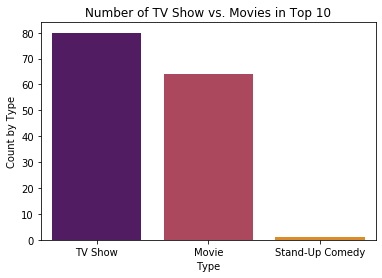

In [292]:
sns.countplot(x="type", data=df2, palette='inferno').set_title("Number of TV Show vs. Movies in Top 10")
plt.xlabel('Type')
plt.ylabel('Count by Type')

# IMPORT 2ND DB

In [134]:
# Import Kaggle Netflix DB
kaggle = pd.read_csv("zippedData/netflix_titles.csv")
kaggle.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [135]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [136]:
kaggle.describe()

,show_id,release_year
count,"6,234","6,234"
mean,"76,703,679","2,013"
std,"10,942,965",9
min,"247,747","1,925"
25%,"80,035,802","2,013"
50%,"80,163,367","2,016"
75%,"80,244,889","2,018"
max,"81,235,729","2,020"


# Cleaning

In [137]:
# Check for duplicates
duplicates = kaggle[kaggle.duplicated()]
print(len(duplicates))
duplicates.head()

0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [138]:
# Check and get count of Null values per column
kaggle.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [139]:
# percent and counts of nulls per column
print('% of nulls director:', len(kaggle[kaggle.director.isna()])/len(kaggle))
print('number of unique director values:', kaggle.director.nunique())

print('% of nulls cast:', len(kaggle[kaggle.cast.isna()])/len(kaggle))
print('number of unique cast values:', kaggle.cast.nunique())

print('% of nulls country:', len(kaggle[kaggle.country.isna()])/len(kaggle))
print('number of unique country values:', kaggle.country.nunique())

print('% of nulls date_added:', len(kaggle[kaggle.date_added.isna()])/len(kaggle))
print('number of unique date_added values:', kaggle.date_added.nunique())

print('% of nulls rating:', len(kaggle[kaggle.rating.isna()])/len(kaggle))
print('number of unique rating values:', kaggle.rating.nunique())

% of nulls director: 0.31584857234520375
number of unique director values: 3301
% of nulls cast: 0.09143407122232916
number of unique cast values: 5469
% of nulls country: 0.0763554700032082
number of unique country values: 554
% of nulls date_added: 0.0017645171639396856
number of unique date_added values: 1524
% of nulls rating: 0.0016041065126724415
number of unique rating values: 14


In [140]:
# Drop Director column: 32% null
kaggle.drop(['director'], axis=1)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [141]:
# replace nulls
kaggle['director'] = kaggle['director'].fillna('unknown')
kaggle['cast'] = kaggle['cast'].fillna('unknown')
kaggle['country'] = kaggle['country'].fillna('unknown')
kaggle['date_added'] = kaggle['date_added'].fillna('unknown')
kaggle['rating'] = kaggle['rating'].fillna('unknown')

In [142]:
# Check nulls were replaced
kaggle.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# VISUALIZATIONS

In [143]:
kaggle_grouped = kaggle.groupby(['release_year','type'])['title'].count().reset_index()
kaggle_grouped.tail(10)

,release_year,type,title
105,2016,Movie,593
106,2016,TV Show,237
107,2017,Movie,682
108,2017,TV Show,277
109,2018,Movie,646
110,2018,TV Show,417
111,2019,Movie,400
112,2019,TV Show,443
113,2020,Movie,6
114,2020,TV Show,19


In [144]:
# TV Shows vs. Movies on Netflix 2007 - 2019 . 2007 is when they started streaming. filter out 2020
kaggle_filtered = kaggle_grouped.loc[(kaggle_grouped['release_year']>2006) & (kaggle_grouped['release_year']<2020)]
kaggle_filtered.head()

,release_year,type,title
87,2007,Movie,60
88,2007,TV Show,11
89,2008,Movie,87
90,2008,TV Show,20
91,2009,Movie,87


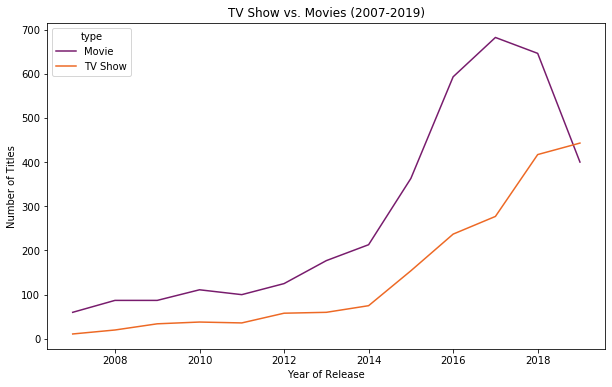

In [290]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set(xlabel='Year of Release', ylabel='Number of Titles')
ax = sns.lineplot(x='release_year', y='title', data=kaggle_filtered, hue='type', markers=True, palette='inferno').set_title("TV Show vs. Movies (2007-2019)")

In [146]:
# show 2017 - 2019 for better visual
kaggle_filtered2 = kaggle_grouped.loc[(kaggle_grouped['release_year']>2016) & (kaggle_grouped['release_year']<2020)]
kaggle_filtered2

,release_year,type,title
107,2017,Movie,682
108,2017,TV Show,277
109,2018,Movie,646
110,2018,TV Show,417
111,2019,Movie,400
112,2019,TV Show,443


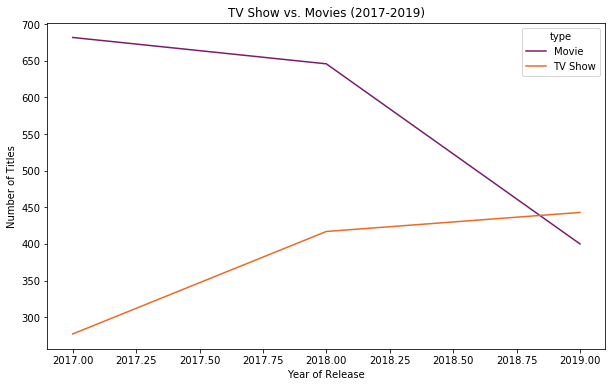

In [291]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set(xlabel='Year of Release', ylabel='Number of Titles')
ax = sns.lineplot(x='release_year', y='title', data=kaggle_filtered2, hue='type', markers=True, palette='inferno').set_title("TV Show vs. Movies (2017-2019)")